---

### Definición:
Implementar y entrenar una red neuronal convolucional (CNN) en Keras para clasificar imágenes del conjunto de datos CIFAR-10, utilizando capas convolucionales, de pooling y densas.

### Objetivo:
Desarrollar un modelo de aprendizaje profundo capaz de reconocer y clasificar imágenes en 10 categorías distintas dentro del dataset CIFAR-10, optimizando su precisión mediante técnicas de normalización, función de activación ReLU y optimizador Adam.

Importamos lo necesario

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

Cargamos el dataset CIFAR-10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Normalizamos las imágenes

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Convertimos etiquetas a one-hot encoding

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Define el modelo

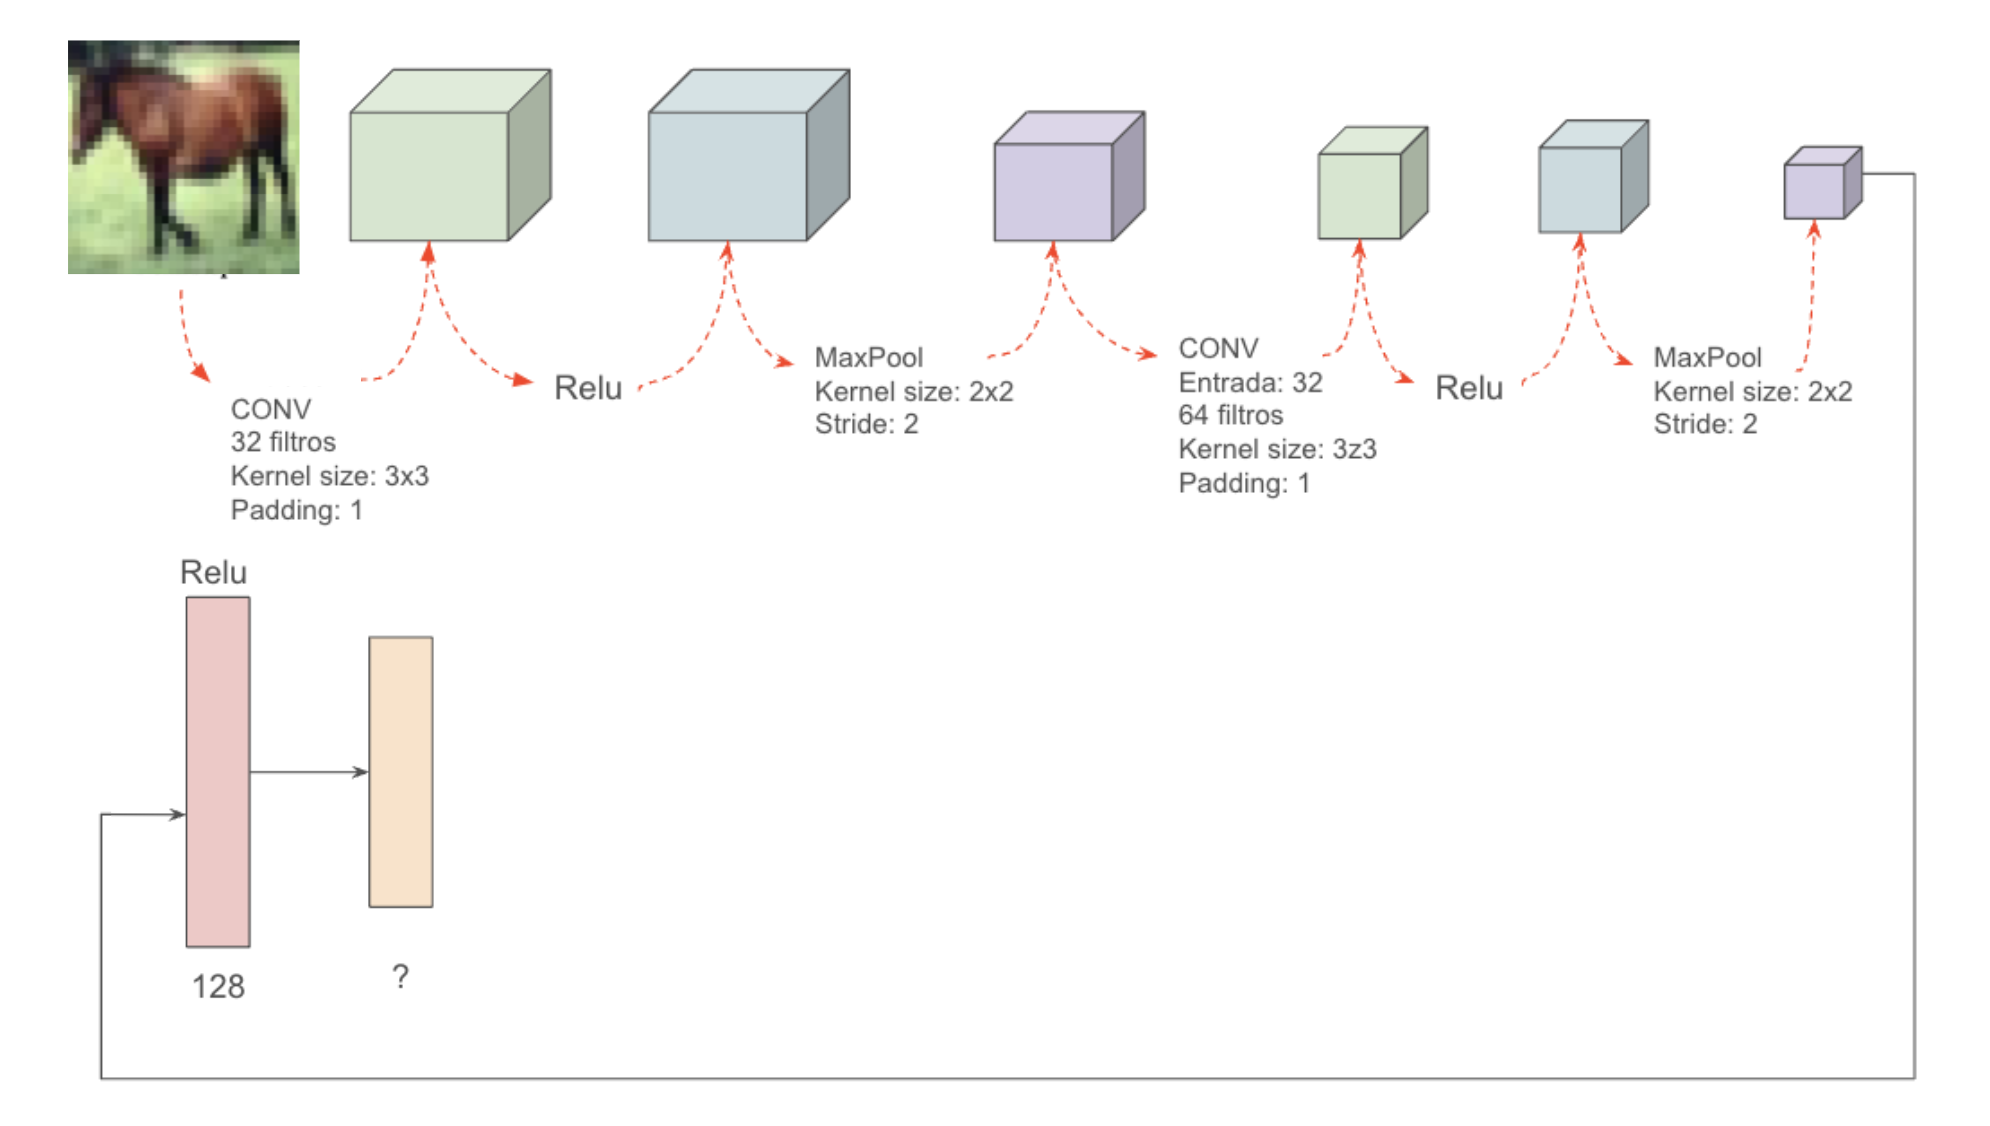

In [24]:
# Construye el modelo siguiendo el diagrama
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Compila el modelo. Ten en cuenta que el target está definido como one-hot vector. Por lo que el loss debe ser 'categorical_crossentropy'

In [25]:
# TU CODIGO AQUI
#definimos el CallBack de early Stopping
early_stoping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

Entrena el modelo

In [26]:
# TU CODIGO AQUI
history_cnn = cnn_model.fit(x_train, y=y_train,
                        validation_split=0.2,
                        epochs=50,
                        batch_size=32,
                        callbacks=[early_stoping])

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3681 - loss: 1.7049 - val_accuracy: 0.5320 - val_loss: 1.3271
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6061 - loss: 1.1026 - val_accuracy: 0.6207 - val_loss: 1.0747
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6771 - loss: 0.9109 - val_accuracy: 0.6596 - val_loss: 0.9671
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7243 - loss: 0.7772 - val_accuracy: 0.6716 - val_loss: 0.9406
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7617 - loss: 0.6820 - val_accuracy: 0.6900 - val_loss: 0.9143
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7929 - loss: 0.5897 - val_accuracy: 0.7061 - val_loss: 0.8815
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8245 - loss: 0.4954 - val_accuracy: 0.7025 - val_loss: 0.9342
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8507 - loss: 0.4219 -

In [27]:
#evaluamos el modelo
loss_cnn, acc_cnn = cnn_model.evaluate(x_test, y_test)
print(f'Loss: {loss_cnn}, Accuracy: {acc_cnn}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7086 - loss: 0.8960
Loss: 0.9059699177742004, Accuracy: 0.7028999924659729


Obten las gráficas de loss y accuracy

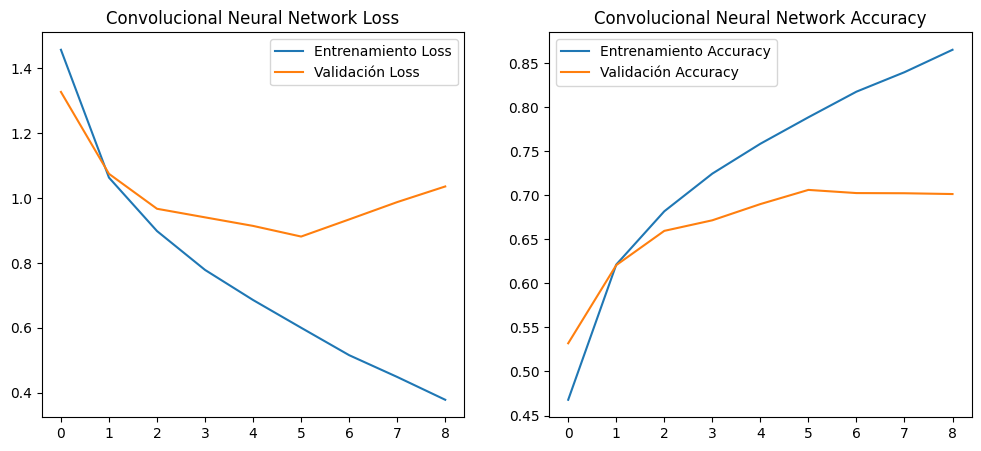

In [28]:
# TU CODIGO AQUI
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Entrenamiento Loss')
plt.plot(history_cnn.history['val_loss'], label='Validación Loss')
plt.legend()
plt.title('Convolucional Neural Network Loss')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Entrenamiento Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validación Accuracy')
plt.legend()
plt.title('Convolucional Neural Network Accuracy')
plt.show()

Interpreta los resultados. ¿Es un buen entrenamiento? ¿Hay presencia de underfittin u overfitting?

Respuesta.-

Se puede decir que si tiene un buen entrenamiento porque la precision es del 70% pero el Loss es demaciado alto con 0.8960.

Se puede observar que el Loss llega a un punto donde empieza a crecer y la precision del entrenamiento se mantiene sobre el 70% y puede que llegue a bajar

Esto nos indica que el modelo pueda estar sufriendo de sobreajuste y que los datos sean menos confiables en las predicciones